In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\asifr\anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1h             |       he774522_0         5.8 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    --------------------------------------------------

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Manchester').text 
soup = BeautifulSoup(source, 'lxml')

In [3]:

csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [4]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [5]:

csv_file.close()

In [6]:
manchester_raw = pd.read_csv('manchester.csv')


In [7]:
manchester_raw.shape


(64, 1)

In [8]:
manchester_raw


,Neighbourhood
0,Baguley
1,Barlow Moor
2,"Belle Vue, Manchester"
3,Benchill
4,"Beswick, Manchester"
5,Blackley
6,Bradford-with-Beswick
7,"Bradford, Manchester"
8,Brooklands (Manchester ward)
9,Burnage


In [9]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [10]:
man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [11]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Baguley,53.399090,-2.285610
1,Barlow Moor,53.422201,-2.246093
2,"Belle Vue, Manchester",42.955853,-71.459019
3,Benchill,53.381730,-2.261250
4,"Beswick, Manchester",53.478390,-2.200320


In [40]:

CLIENT_ID = 'XXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version



In [13]:
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


In [14]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

In [15]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [16]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

<ipython-input-16-4decbc75657f>:21: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby = json_normalize(results) # Flatten JSON


In [17]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Baguley,53.39909,-2.28561,McDonald's,Fast Food Restaurant,53.400461,-2.289088
1,Baguley,53.39909,-2.28561,Lidl,Supermarket,53.400455,-2.295649
2,Baguley,53.39909,-2.28561,Wythenshawe Park,Park,53.404952,-2.279563
3,Baguley,53.39909,-2.28561,B&M Store,Furniture / Home Store,53.401589,-2.299105
4,Baguley,53.39909,-2.28561,Costa Coffee,Coffee Shop,53.400795,-2.295027


In [18]:

man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Airport,Airport Lounge,Airport Service,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Home Service,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Motorcycle Shop,Multiplex,Museum,Music Venue,Nature Preserve,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pizza Place,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Record Shop,Rental Car Location,Restaurant,River,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Yoga Studio
0,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [19]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Airport,Airport Lounge,Airport Service,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Brewery,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Caribbean Restaurant,Cheese Shop,Child Care Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Convenience Store,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Gay Bar,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,History Museum,Home Service,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Monument / Landmark,Motorcycle Shop,Multiplex,Museum,Music Venue,Nature Preserve,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pizza Place,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Record Shop,Rental Car Location,Restaurant,River,Sandwich Place,Science Museum,Shoe Store,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Used Auto Dealership,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Yoga Studio
0,Baguley,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.058824,0.000000,0.058824,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.058824,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.058824,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.0,0.000000,0.058824,0.0,0.058824,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.117647,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.176471,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0
1,Barlow Moor,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.033333,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.0,0.066667,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.0,0.0,0.066667,0.00,0.1,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.033333,0.000000,0.0,0.000000,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.133333,0.0,0.0,0.000000,0.033333,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0

In [20]:

def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [21]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Furniture / Home Store,Donut Shop,Photography Studio,Pet Store,Coffee Shop,Clothing Store,Park,Monument / Landmark
1,Barlow Moor,Pub,Bar,Italian Restaurant,Deli / Bodega,Indian Restaurant,Persian Restaurant,Supermarket,Boutique,Tea Room,Tennis Court
2,"Belle Vue, Manchester",Weight Loss Center,Film Studio,Business Service,Intersection,Yoga Studio,Event Service,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,Benchill,Tram Station,Fast Food Restaurant,Discount Store,Supermarket,Tanning Salon,Fish & Chips Shop,Sandwich Place,Coffee Shop,Department Store,Convenience Store
4,"Beswick, Manchester",Gym,Soccer Field,Sporting Goods Shop,Tram Station,Athletics & Sports,Track Stadium,Child Care Service,Event Space,Soccer Stadium,Lounge


In [22]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [24]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

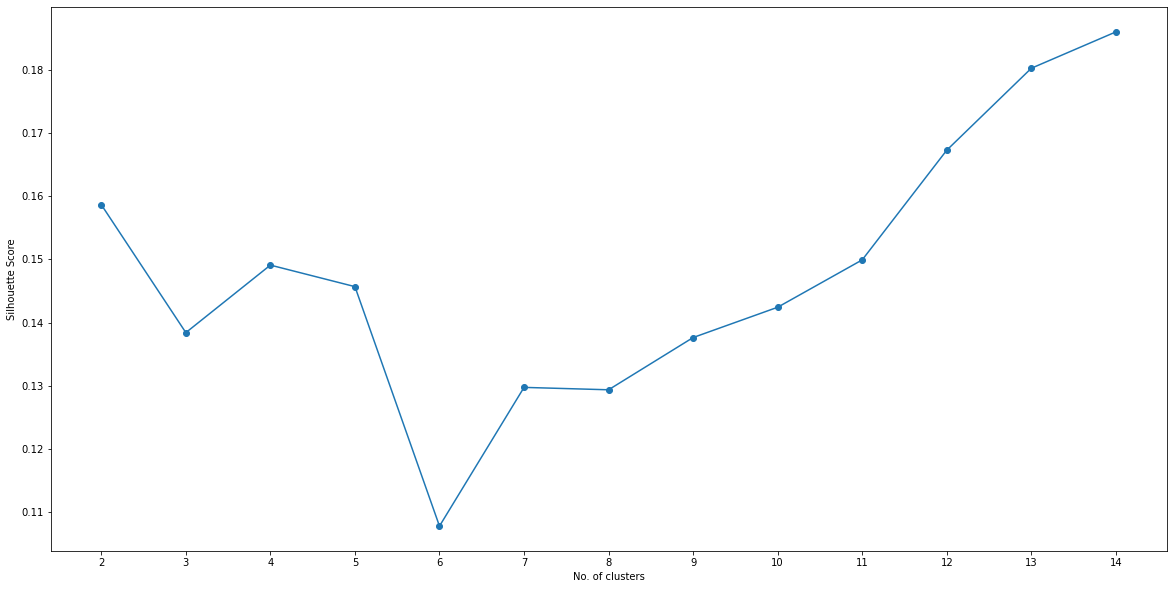

In [25]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")


In [26]:
opt_value = 8


In [27]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)


In [28]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [29]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,53.399090,-2.285610,2,Tram Station,Supermarket,Furniture / Home Store,Donut Shop,Photography Studio,Pet Store,Coffee Shop,Clothing Store,Park,Monument / Landmark
1,Barlow Moor,53.422201,-2.246093,3,Pub,Bar,Italian Restaurant,Deli / Bodega,Indian Restaurant,Persian Restaurant,Supermarket,Boutique,Tea Room,Tennis Court
2,"Belle Vue, Manchester",42.955853,-71.459019,4,Weight Loss Center,Film Studio,Business Service,Intersection,Yoga Studio,Event Service,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,Benchill,53.381730,-2.261250,2,Tram Station,Fast Food Restaurant,Discount Store,Supermarket,Tanning Salon,Fish & Chips Shop,Sandwich Place,Coffee Shop,Department Store,Convenience Store
4,"Beswick, Manchester",53.478390,-2.200320,6,Gym,Soccer Field,Sporting Goods Shop,Tram Station,Athletics & Sports,Track Stadium,Child Care Service,Event Space,Soccer Stadium,Lounge


In [30]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

In [31]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Chorlton (ward),Bar,Pizza Place,Pub,Café,Deli / Bodega,Food & Drink Shop,Falafel Restaurant,Spanish Restaurant,Fish Market,Nature Preserve
15,Chorlton-cum-Hardy,Bar,Pizza Place,Pub,Café,Deli / Bodega,Food & Drink Shop,Falafel Restaurant,Spanish Restaurant,Fish Market,Nature Preserve
16,Chorlton-on-Medlock,Bar,Pizza Place,Pub,Café,Deli / Bodega,Food & Drink Shop,Falafel Restaurant,Spanish Restaurant,Fish Market,Nature Preserve
17,Chorltonville,Bar,Pizza Place,Pub,Café,Deli / Bodega,Food & Drink Shop,Falafel Restaurant,Spanish Restaurant,Fish Market,Nature Preserve
60,"Whalley Range, Manchester",Bar,Park,Grocery Store,Indian Restaurant,Tram Station,Tibetan Restaurant,Sandwich Place,Chinese Restaurant,Lake,Asian Restaurant


In [32]:

val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Bradford, Manchester",Hotel,Supermarket,Flea Market,Gym / Fitness Center,Sandwich Place,Park,Ethiopian Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
29,Harpurhey,Hotel,Supermarket,Flea Market,Gym / Fitness Center,Sandwich Place,Park,Ethiopian Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant
39,"Moston, Manchester",Hotel,Supermarket,Flea Market,Gym / Fitness Center,Sandwich Place,Park,Ethiopian Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [33]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Furniture / Home Store,Donut Shop,Photography Studio,Pet Store,Coffee Shop,Clothing Store,Park,Monument / Landmark
3,Benchill,Tram Station,Fast Food Restaurant,Discount Store,Supermarket,Tanning Salon,Fish & Chips Shop,Sandwich Place,Coffee Shop,Department Store,Convenience Store
37,Miles Platting,Men's Store,Thai Restaurant,Tram Station,Park,Yoga Studio,Event Service,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant
45,Northern Moor,Tram Station,Grocery Store,Monument / Landmark,Park,Lebanese Restaurant,Bowling Green,Chinese Restaurant,Convenience Store,Fast Food Restaurant,Gym / Fitness Center
51,"Peel Hall, Wythenshawe",Tram Station,Fast Food Restaurant,Supermarket,Deli / Bodega,Market,Tanning Salon,Bakery,Coffee Shop,Fish & Chips Shop,Home Service
63,Wythenshawe,Tram Station,Fast Food Restaurant,Grocery Store,Soccer Field,Chinese Restaurant,Clothing Store,Lebanese Restaurant,Bowling Green,Monument / Landmark,Electronics Store


In [34]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barlow Moor,Pub,Bar,Italian Restaurant,Deli / Bodega,Indian Restaurant,Persian Restaurant,Supermarket,Boutique,Tea Room,Tennis Court
8,Brooklands (Manchester ward),Bar,Plaza,Café,Restaurant,Coffee Shop,Italian Restaurant,Burger Joint,Theater,Cocktail Bar,Pub
9,Burnage,Pub,Supermarket,Park,Bar,Dessert Shop,Train Station,Rental Car Location,Record Shop,Toy / Game Store,Indian Restaurant
10,Burnage (ward),Pub,Supermarket,Park,Bar,Dessert Shop,Train Station,Rental Car Location,Record Shop,Toy / Game Store,Indian Restaurant
11,Castlefield,Restaurant,Indian Restaurant,Pub,Science Museum,Steakhouse,Hotel,Cocktail Bar,Bar,Japanese Restaurant,Spanish Restaurant
12,"Cheetham, Manchester",Pub,Italian Restaurant,Bar,Brewery,Concert Hall,Department Store,Speakeasy,Café,Sandwich Place,Coffee Shop
18,Circle Square Manchester,Bar,Pub,Coffee Shop,Burrito Place,Ice Cream Shop,Multiplex,College Arts Building,Tea Room,Museum,Indian Restaurant
22,Didsbury,Pub,Park,Italian Restaurant,Grocery Store,Café,Indian Restaurant,Cheese Shop,Supermarket,Coffee Shop,Tea Room
23,Fallowfield,Pub,Gym / Fitness Center,Asian Restaurant,Park,Racetrack,Chinese Restaurant,Bed & Breakfast,Bar,Portuguese Restaurant,Indian Restaurant
27,Green Quarter,Pub,Coffee Shop,Bar,Brewery,Park,Concert Hall,Escape Room,Pie Shop,Record Shop,Food Court


In [35]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Belle Vue, Manchester",Weight Loss Center,Film Studio,Business Service,Intersection,Yoga Studio,Event Service,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [36]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Great Heaton,Pub,Nature Preserve,Italian Restaurant,Coffee Shop,Yoga Studio,Event Service,Film Studio,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [37]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Beswick, Manchester",Gym,Soccer Field,Sporting Goods Shop,Tram Station,Athletics & Sports,Track Stadium,Child Care Service,Event Space,Soccer Stadium,Lounge
5,Blackley,Hotel,Café,Grocery Store,Coffee Shop,Pharmacy,Yoga Studio,Event Service,Film Studio,Fast Food Restaurant,Farmers Market
6,Bradford-with-Beswick,Gym,Soccer Field,Sporting Goods Shop,Tram Station,Athletics & Sports,Track Stadium,Child Care Service,Event Space,Soccer Stadium,Lounge
14,Chorlton Park (ward),Grocery Store,Park,Pizza Place,Tram Station,Indian Restaurant,Yoga Studio,Café,Falafel Restaurant,Bus Station,Spanish Restaurant
20,Collyhurst,Coffee Shop,Grocery Store,Fast Food Restaurant,Clothing Store,Furniture / Home Store,Men's Store,Brewery,Sandwich Place,Chinese Restaurant,Pub
21,Crumpsall,Bakery,Halal Restaurant,Pizza Place,Coffee Shop,River,Sandwich Place,Fried Chicken Joint,Park,Ethiopian Restaurant,Farmers Market
25,Gorton,Train Station,Park,Gym / Fitness Center,Hotel,Racetrack,Bus Station,Soccer Stadium,Supermarket,Market,Sandwich Place
30,Highfield Country Park,Gym,Grocery Store,Fast Food Restaurant,Supermarket,Bakery,English Restaurant,Shopping Mall,Café,Bar,Pizza Place
32,Ladybarn,Grocery Store,Asian Restaurant,Park,Supermarket,Pub,Burger Joint,Indian Restaurant,Fast Food Restaurant,Bus Stop,Fish & Chips Shop
33,Levenshulme,Grocery Store,Café,Park,Indian Restaurant,Plaza,Trail,Farmers Market,Sandwich Place,Bus Stop,Fast Food Restaurant


In [38]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,"Clayton, Manchester",Tram Station,Discount Store,Supermarket,Pub,Sandwich Place,Park,Clothing Store,Coffee Shop,Bus Stop,Shopping Mall
24,"Glenbrook, Greater Manchester",Pub,Supermarket,Light Rail Station,Hotel,Discount Store,Golf Course,Park,Film Studio,Fast Food Restaurant,Farmers Market
41,New Moston,Hotel,Supermarket,Pizza Place,Convenience Store,Soccer Stadium,Pub,Tram Station,Train Station,Coffee Shop,Malay Restaurant
42,Newall Green,Bus Stop,Tram Station,Stationery Store,Convenience Store,Pub,Grocery Store,Business Service,Coffee Shop,Sandwich Place,Furniture / Home Store
43,Newton Heath,Supermarket,Shoe Store,Bus Stop,Tram Station,Park,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fabric Shop,Event Space
